In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="white")

### HR Human Resources Analytics Kaggle Dataset

#### Table of Contents

1. Background 
* Descriptive Analytics
* Data Prepation
* Model Building
* Model Analysis
* Conclusion

This is a simulated dataset from Kaggle:
https://www.kaggle.com/ludobenistant/hr-analytics

The dataset provides information about employees at a hypothetical company. My goal for this project is to predict which employees will leave next by using the features in the dataset, and practice feature engineering and predictive analytics. 

#### 2. Descriptive Analytics

Reading in the dataset, which I've downloaded locally on my computer:

In [2]:
df = pd.read_csv('HR_comma_sep.csv')

In [3]:
print ('number of rows:', len(df))
print ('number of cols (features):', len(df.columns))

number of rows: 14999
number of cols (features): 10


In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


We're not given descriptions on what each column means, so I'll make some assumptions:

* <b>satisfaction_level:</b> last employee measured satisfaction level. possible values 0 to 1, with 1 being the best.
* <b>last_evaluation:</b> last employer evaluation of the employee. possible values 0 to 1, with 1 being the best. 
* <b>number_project:</b> number of projects the employee worked on during their duration at the company.
* <b>average_montly_hours:</b> average monthly hours the employee spent working at the company. 
* <b>time_spend_company:</b> integer value in years spent at the company (assumed it was rounded to the nearest whole year)
* <b>Work_accident:</b> 1 meaning 'yes the employee had a workplace accident' and 0 meaning 'no they have not'. binary (1 or 0).
* <b>left:</b> 1 meaning 'yes the employee left' and 0 meaning 'no they have not'. binary (1 or 0).
* <b>promotion_last_5years:</b> 1 meaning 'yes the employee had a promotion' and 0 meaning 'no they have not'. binary (1 or 0).
* <b>sales:</b> department the employee worked in.
* <b>salary:</b> categorical values are high, medium, low. We don't have actual numbers for what values those classifications refer to.

the *left* feature will be our target variable - or the column we're trying to predict.<br><br>
Below I explore the features in more detail to help validate the assumptions of feature definitions above and maybe get a better understanding about the company. 

In [6]:
print ('average time employees spend at the company: {0} years'.format(
    np.round(df.time_spend_company.mean(),2)))

average time employees spend at the company: 3.5 years


In [7]:
print ('fraction of the company workforce that left: {0}'.format(
       np.round(sum(df.left)/float(len(df)),3)))

fraction of the company workforce that left: 0.238


making sure that all 'left' entries take on a binary value ... 

In [8]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [9]:
print('Job Category (raw count):','\n') 
print(df.sales.value_counts())
print('\n','Job Category (% of total):','\n') 
print(df.sales.value_counts()/len(df)*100.0)

Job Category (raw count): 

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

 Job Category (% of total): 

sales          27.601840
technical      18.134542
support        14.860991
IT              8.180545
product_mng     6.013734
marketing       5.720381
RandD           5.247016
accounting      5.113674
hr              4.926995
management      4.200280
Name: sales, dtype: float64


Looks like a really sales driven organization (nearly 1/3 jobs are sales related).

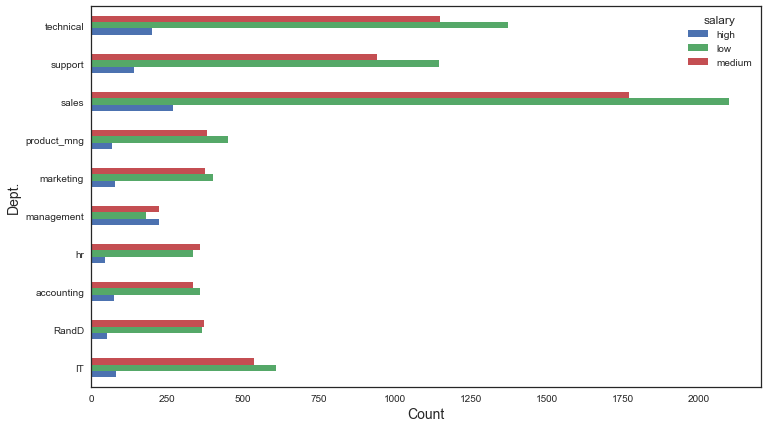

In [151]:
fig,ax = plt.subplots(figsize=(12,7))
df.groupby(['sales','salary']).satisfaction_level.count().unstack().sort_index(axis=0).plot(kind='barh',ax=ax)
ax.set_xlabel('Count',size=14);
ax.set_ylabel('Dept.',size=14);

View on the relative number of employees in each department with 'high', 'medium' and 'low' salaries. Not surprising to see management with both a small employee count and a high number of 'high' salaries relative to to employee count. Comparitively, the other departements show a high number of medium and low salaries (almost equal), with the small minority in that department earning a high salary.

In [12]:
df.satisfaction_level.describe()

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

mean satisfaction level at the company is 0.61%, someone scored as low as 0.09 on their last eval. Not derived from a very sophisticated 'model' but I'd guess this person is likely to leave soon, if they haven't already :P

In [13]:
boxdata = []
dept = []
for d in df.sales.unique():
    dept.append(d)
    boxdata.append(list(df[df.sales==d].satisfaction_level))

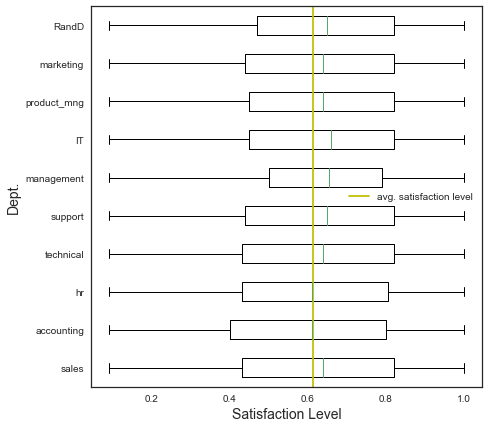

In [14]:
fig,ax = plt.subplots(figsize=(7,7))
plt.boxplot(boxdata,0, 'rs', 0);
ax.set_yticklabels(dept);
plt.axvline(x=df.satisfaction_level.mean(),c='y',label='avg. satisfaction level')
ax.set_xlabel('Satisfaction Level',size=14);
ax.set_ylabel('Dept.',size=14);
ax.legend()

Overall, satisfcation level across company departments is close to the company-wide average of 61% satisfaction. Management has the highest average satisfaction and lowest variance. The HR and accounting departments have the lowest average satisfaction level. We can look at the breakdown of the 'left' flag by department:

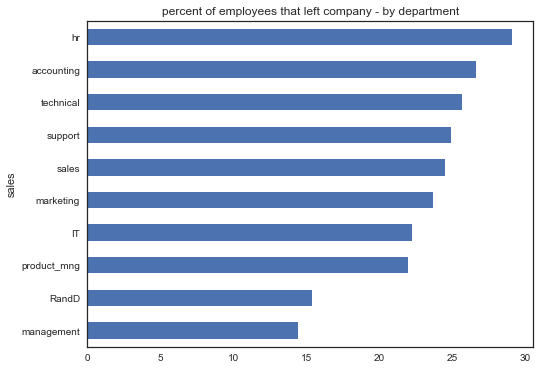

In [15]:
fig,ax = plt.subplots(figsize=(8,6))
(100*(df.groupby('sales').left.sum()/
 df.groupby('sales').satisfaction_level.count())).sort_values(
    ascending=True).plot(kind='barh',ax=ax);
ax.set_title('percent of employees that left company - by department');

From the breakdown above, the HR department had 30% of it's employees leave (over the duration of this data collection). Comparatively, management and R&D departments had only about 15%. Adding in the salaries to the breakdown:

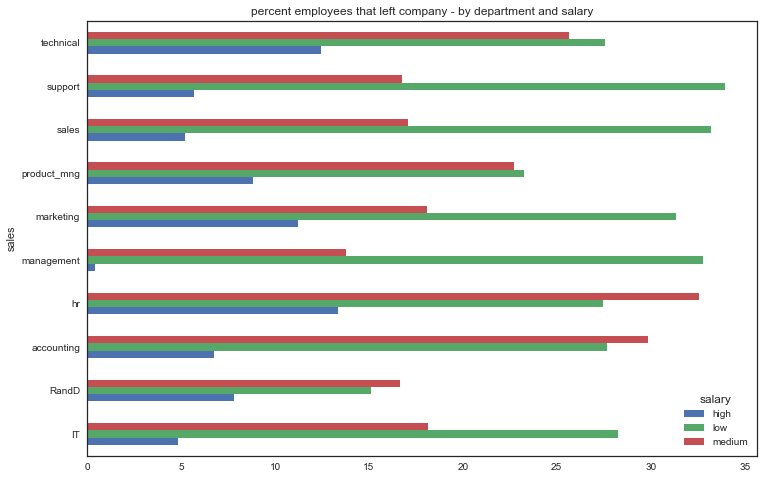

In [305]:
fig,ax = plt.subplots(figsize=(12,8))
(100*(df.groupby(['sales','salary']).left.sum()/
      df.groupby(['sales','salary']).satisfaction_level.count())).unstack().plot(
    kind='barh',ax=ax);
ax.set_title('percent employees that left company - by department and salary');

The plot above *suggests* that salary and department will be strong influencers on whether the employee stays or not. A much higher percentage of 'low salary' employees leave their respective departments - especially in management, sales, marketing, support and IT.

Possible todo: explore possible class imbalance, see:
* https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

#### 2. Data Prepation

Need to first find and fill missing values in the dataset before we split it and feed it the model:

In [20]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

no missing values!!

Next, we need to encode our categorical variables by converting them to a numerical value:

In [21]:
df_model = df.copy()

In [22]:
df_model.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [23]:
num_cols = ['satisfaction_level','last_evaluation','number_project',
           'average_montly_hours','time_spend_company','Work_accident',
           'promotion_last_5years']
cat_cols = ['sales','salary']
target_cols = ['left']

encode the categorical columns with values:

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
for c in cat_cols:
 number = LabelEncoder()
 df_model[c] = number.fit_transform(df_model[c].astype('str'))

compare the original dataframe with the new (df_model), which has the enoded *sales* and *salary* features:

In [26]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [27]:
df_model.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [28]:
print (df.sales.value_counts())
print ('\n')
print (df_model.sales.value_counts())

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64


7    4140
9    2720
8    2229
0    1227
6     902
5     858
1     787
2     767
3     739
4     630
Name: sales, dtype: int64


looks good! We can see from the dataframes that the *sales* category 'sales' was encoded as numerical value 7 (verified by the indexed values in the df_model vs. df and the occurance count for that category).<br><br>
Now we have all numerical values, we can check for correlation among our features:

Plotting code referenced here: http://seaborn.pydata.org/examples/many_pairwise_correlations.html


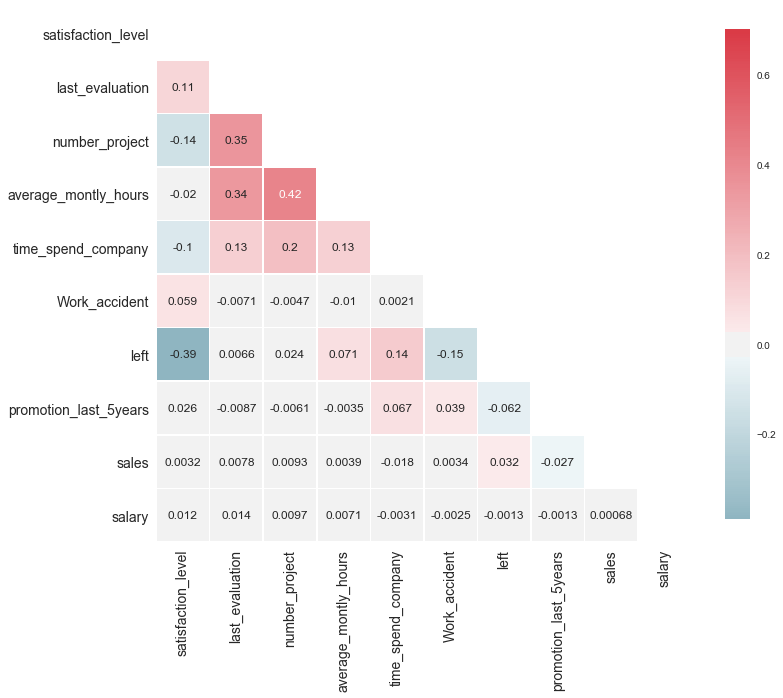

In [29]:
corr = df_model.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,center=0,vmax=0.7,
            square=True, linewidths=.5,cbar_kws={"shrink": .75},
           annot=True)
ax.set_xticklabels(df.columns,size=14);
ax.set_yticklabels(df.columns,size=14);

Not surprising to a positive correlation between number of projects and monthly hours and last evaluation. Also not surprising to see a negative correlation (the strongest negative correlation in the set) between satisfaction level and the left variable. Other than that, it doesn't look like there are any strong correlations among the features.<br><br>
Now we can split the dataset into a 80-20 train and test set:

In [30]:
from sklearn.model_selection import train_test_split
x = df_model[['satisfaction_level','last_evaluation','number_project',
        'average_montly_hours','time_spend_company','Work_accident',
        'promotion_last_5years','sales','salary']]
y = df_model['left']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20)

We'll train the model on using the *xtrain* and *ytrain* dataframes. Then, we'll text using the *xtest* dataset and compare the predicted values to *ytest*

#### 3. Model Building

Recall, we're trying to build a predictive model to classify employee retention based on HR data. I'll try using the Random Forest classification method, as it's fast, easy to use and well documented. More information can be found on the package here:

* http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html
* https://www.datascience.com/resources/notebooks/random-forest-intro
* http://scikit-learn.org/stable/modules/ensemble.html#forest
* https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import time

To find the right parameters to feed into the model, I'll use the GridSearchCV package to find optimal Random Forest parameters. See https://www.inertia7.com/projects/95

In [32]:
forest = RandomForestClassifier()

In [33]:
param_dist = {'max_depth': [2, 3, 4, 5],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}
start = time.time()
cv_rf = GridSearchCV(forest, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)
cv_rf.fit(xtrain,ytrain)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'max_features': None, 'bootstrap': False, 'max_depth': 5, 'criterion': 'gini'}
Time taken in grid search:  21.08


Best parameters to use:
* criterion: gini
* max_features: None
* boostrap: True
* max_depth: 5

The links mentioned above do a good job at explaining what these paremeters mean. Now we can feed these paremeters to the Random Forest classifer:

In [34]:
forest = RandomForestClassifier(criterion = 'gini',
                                max_features=None,
                                bootstrap = True,
                                max_depth = 5,
                                n_estimators=100)
forest.fit(xtrain,ytrain)
forest_predict = forest.predict(xtest)

#### 4. Random Forest Model Analysis

To gain a sense of the models performance, we can generate a confusion matrix. I think https://www.inertia7.com/projects/95 has done a nice job at coding up a custom confusion matrix:

In [35]:
test_results = pd.crosstab(index = ytest,
                           columns = forest_predict)
test_results = test_results.rename(columns= {0: 'Predict: Did not leave', 1: 'Predict: Left'})
test_results.index = ['Actual: Did not leave', 'Actual: Left']
test_results.columns.name = 'n=3000'
test_results

n=3000,Predict: Did not leave,Predict: Left
Actual: Did not leave,2226,29
Actual: Left,48,697


A easier, more visual way to show this may be to use the *confusion_matrix* package from *sklearn*

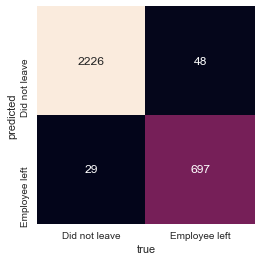

In [36]:
from sklearn.metrics import confusion_matrix
labels = ['Did not leave','Employee left']
mat = confusion_matrix(ytest, forest_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel('true')
plt.ylabel('predicted');

In [37]:
print ('Successful predictions: {0} / 3000 ({1}%) '.format(
    (mat[0][0] + mat[1][1]),np.round((mat[0][0] + mat[1][1])/3000.0,3)))

Successful predictions: 2923 / 3000 (0.974%) 


We can also look at 'feature importance' to see the which attributes have the biggest impact on employee retention. This is where we really start to pull value out of our classification model.<br><br>For more on features see:
* http://blog.datadive.net/selecting-good-features-part-iii-random-forests/

In [41]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [51]:
print("Feature ranking:")
for f in range(len(xtrain.columns)):
    print('{0}. {1} : ({2})'.format(f + 1, xtrain.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. satisfaction_level : (0.5367195077164376)
2. time_spend_company : (0.14738568592162019)
3. last_evaluation : (0.14150172563717245)
4. number_project : (0.10563631267577815)
5. average_montly_hours : (0.06802834500145186)
6. sales : (0.0005438864111416554)
7. salary : (0.00017806557104454296)
8. Work_accident : (6.471065353563382e-06)
9. promotion_last_5years : (0.0)


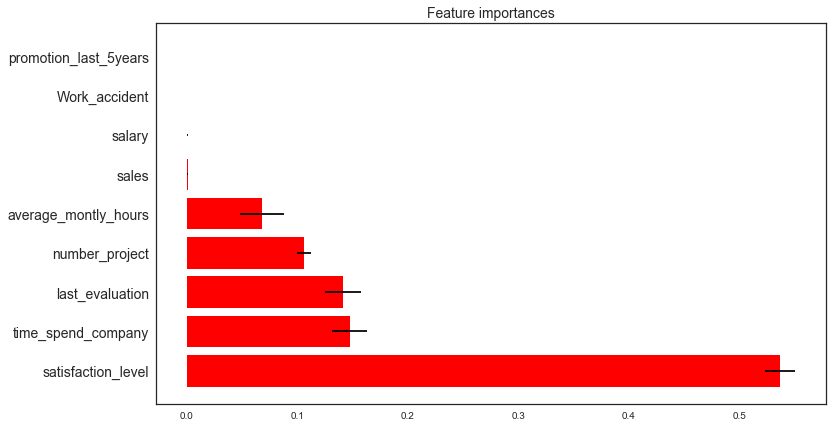

In [52]:
fig,ax = plt.subplots(figsize=(12,7))
ax.barh(range(len(xtrain.columns)), importances[indices],
       color="r", xerr=std[indices], align="center")
ax.set_yticks(range(len(xtrain.columns)))
ax.set_yticklabels(xtrain.columns[indices],fontsize=14)
ax.set_title('Feature importances',fontsize=14);

It's not too surprising to see satisfaction level at the top. This also aligns with the correlation matrix above which should a moderate negative correlation between satisfaction level and employee retention (i.e. the higher the satisfaction level, the less likely the employee is to leave, represented by the numerical flag '0'). It is interesting to see the salary field so low on the list and with such a lower feature importance score. We know also from our correlation matrix that there was no apparent negative correlation between salary and the retention flag.<br><br>

### Conclusion


Turnover is very expensive for a company through recruting costs and training new employees. Currently, this company's retention is around 75%. Although it's not known over what time duration this data was collected, the dataset suggests roughly 1/4 employees have left the company voluntarily. <br><br>
The analysis above would be valuable to the HR Manager and Management team. They should use the analysis above to help implement programs across this company aimed at reducing turnover.

##### Improving Satisfaction levels

Seeing that satisfaction is the strongest feature predicting employee retention, the company way want to investigate more in workplace culture or employee perks to boost satisfaction levels. Satisfaction levels (on average) are lowest among the HR and accounting department - perhaps those managers need to take extra initiative to help boost employee moral or investigate poor work culture on their teams. Perks should be implemented company-wide, here are some ideas:

https://www.inc.com/sujan-patel/8-cheap-culture-building-perks-your-employees-will-love.html

##### Addressing Work 'Veterans'

From the model, it looks like the longer the employee works at the company, the more likely they are to leave. Perhaps the company can implement some sort sabatical-type program where the after a certain number of years worked (ex. 3 years), employees can take an (optional) 2-3 month sabatical. Other options might be to increase vacation days, or implement a rotation-program at work for employees to cycle through departments and keep work interesting.